Chapter 11 of [A Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#W7jZxE54KWWuUWEC.97), *Scale Analysis*, discusses the conditions where waves can be considered in terms of ray theory. It turns out, this is not a bad approximation when the spatial variability in the physical parameters that define the wave propagation is large compared to the propagating wavelengths. Then, the Eikonal equation describes the travel time $T$ for a ray in a medium with wave speed $v({\bf r})$ as $$ |\nabla T({\bf r})|^2 = 1/v({\bf r})^2.$$ 
This describes how the gradient of the travel time $T$ of a ray depends on the (local) velocity. In our book you can read how to derive [Snell's Law](https://en.wikipedia.org/wiki/Snell%27s_law) from the Eikonal equation, for example. 

There are many strategies -- under the umbrella of "ray tracing"  -- to find the travel time of rays in media with arbitrary velocity distributions, but here we will explore the travel time and ray path of seismic waves in a spherically symmetric approximation of Earth.

### Rays in a spherically symmetric Earth
Having accepted ray theory in the Earth for high-frequency seismic waves, we can estimate the travel time $T$ and epicentral distance $\Delta$ of "seismic rays." To first order, the Earth is spherically symmetric, greatly simplifying ray propagation. In a spherically symmetric velocity model $v({\bf r})= v(r)$: 

![Figure 1](https://auckland.figshare.com/ndownloader/files/14738099)

First, a small part of the ray path $ds$ satisfies Pythagoras' Rule: $ds^2 = dr^2 + (rd\Delta)^2$. Secondly, The take-off angle $\sin i = dr/ds$. Thirdly, Snell's Law in a spherically symmetric Earth is $p = r\sin (i) /v$. This $p$ is the (constant) ray parameter. 

#### Homework
Combining these three expressions, show that

$$ \frac{ds}{dr} = \frac{r}{\sqrt{r^2-(pv)^2}} \ \ \ \ \ \mbox{and}   \ \ \ \ \ \ \frac{d\Delta}{dr} = \frac{pv/r}{\sqrt{r^2-(pv)^2}}.$$
To find the total ray path length $s$ and the epicentral distance $\Delta$, we integrate these expressions with regards to $r$. 

### Time and distance of a ray
Let's consider a ray that starts and ends at the surface, and travels an epicentral distance $\Delta$:
![Figure 2](https://auckland.figshare.com/ndownloader/files/14754827)

Then, we take advantage of the symmetry, by integrating twice from the point of maximum depth of the ray $r=r_0$ to the surface $r= R$:
$$
\Delta(p) = 2 \int_{r_0}^R \frac{pv/r} {\sqrt{r^2-(pv)^2}}dr.
$$ 

The travel time requires integration of $\frac{1}{v}\frac{ds}{dr}$ over $r$, so that:
$$
T(p) = 2 \int_{r_0}^R \frac{r/v} {\sqrt{r^2-(pv)^2}}dr.
$$
These equations could have also been derived directly from the Eikonal equation and the equation of kinematic ray tracing (see Aki and Richards, for example).

### Rays in a sphere with constant speed
In his book *Principles of Seismology*, Udias derives expressions for travel time and epicentral distance directly for the special case of a sphere with radius $R$ and a constant speed: $v(r) =c$. In this simplest of cases, the rays don't bend: 

![Figure 3](https://auckland.figshare.com/ndownloader/files/14777435)
and the 
$$
T(p) = \frac{2}{c}\sqrt{R^2-p^2c^2}
$$
and
$$
\Delta(p) = 2\cos^{-1}\left(\frac{pc}{R}\right).
$$

####  Homework
Convince yourself of Udias' results by differentiating the expressions for $T$ and $\Delta$ with respect to $r$ to confirm the integrands for the general expressions of $T(p)$ and $\Delta(p)$ stated earlier.

Alternatively, we can compare the analytic solution and the intregral solution with a numerical approximation:

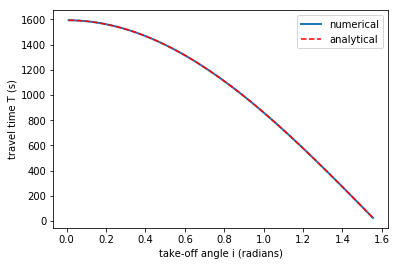

In [20]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

# integrand for the travel time:
def integrand(r, c, p):
    return (2*r/c)/np.sqrt(r**2-(c*p)**2) 

c = 8 # km/s
R = 6371 # radius in km

t= [] # travel times
t_udias = []
angles = np.linspace(0.01,0.99*np.pi/2,100) # (almost) all angles, just avoiding some singularities

for angle in angles:
    p = R*np.sin(angle)/c
    t.append(quad(integrand, p*c, R, args=(c,p))[0])
    t_udias.append((2/c)*np.sqrt(R**2-(p*c)**2))

plt.plot(angles,t,linewidth=2,label='numerical')
plt.plot(angles,t_udias,'--r',label='analytical')
plt.xlabel('take-off angle i (radians)')
plt.ylabel('travel time T (s)')
plt.legend()
plt.show()

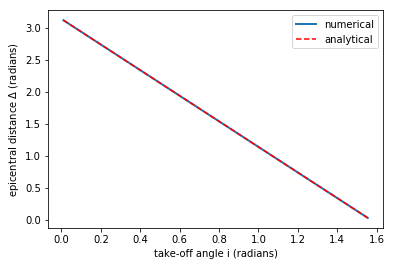

In [3]:
# integrand for the epicentral distance:
def integrand(r, c, p):
    return (2*p*c/r)/np.sqrt(r**2-(c*p)**2) 

delta= [] # epicentral distances
delta_udias = []
#angles = np.linspace(0.01,0.99*np.pi/2,100) # (almost) all angles, just avoiding some singularities

for angle in angles:
    p = R*np.sin(angle)/c
    delta.append(quad(integrand, p*c, R, args=(c,p))[0])
    delta_udias.append(2*np.arccos(p*c/R)) # analytic solution for c = constant

plt.plot(angles,delta,linewidth=2,label='numerical')
plt.plot(angles,delta_udias,'--r',label='analytical')
plt.legend()
plt.xlabel('take-off angle i (radians)')
plt.ylabel('epicentral distance $\Delta$ (radians)')
plt.plot()
plt.show()

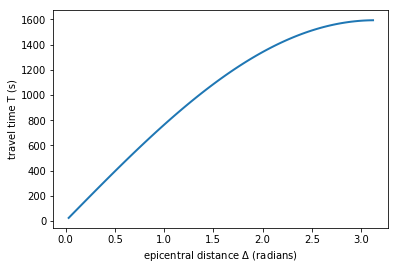

In [4]:
plt.plot(delta,t,linewidth=2,label='numerical')
plt.ylabel('travel time T (s)')
plt.xlabel('epicentral distance $\Delta$ (radians)')
plt.plot()
plt.show()

This is not quite linear, because the speed is constant, but the epicentral distance is an arc. But how about plotting travel time $T$ as a function of ray length $s$, using the sine rule $$\frac{s}{\sin(\Delta)} = \frac{R}{\sin\left(i\right)} = \frac{R}{\sin\left(\frac{\pi-\Delta}{2}\right)},$$
because:

![Figure 4](https://auckland.figshare.com/ndownloader/files/14777429)

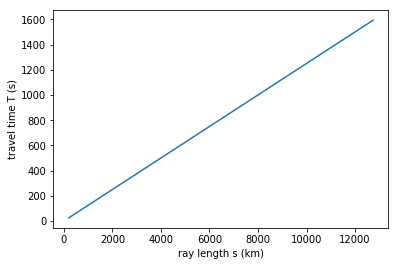

In [5]:
s = R*np.sin(delta)/np.sin((np.pi-np.array(delta))/2)
plt.plot(s,t)
plt.xlabel('ray length s (km)')
plt.ylabel('travel time T (s)')
plt.show()

Now we observe -- as expected -- that for a sphere with a constant wave speed, the travel time is linear with the length of the ray! 

## PREM

In the Earth, the seismic wave speed varies with depth. For example, there is a sudden drop in wave speed (due to a phase change) from the outer to the inner core. More realistic P- and S-wave speeds as a function of the depth, based on seismic observations, are captured in the [Preliminary Reference Earth Model (PREM)](https://en.wikipedia.org/wiki/Preliminary_reference_Earth_model):

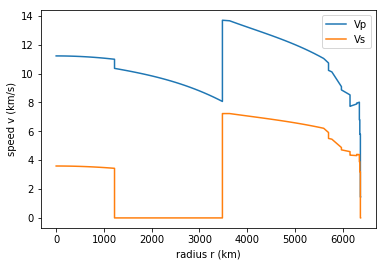

In [21]:
import pandas as pd

url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
c = pd.read_csv(url, usecols=[0,2,3], names=['radius', 'vP','vS'], header=None)
vp = np.array(c['vP'])/1000
vs = np.array(c['vS'])/1000
r = np.array(c['radius'])/1000
plt.plot(r,vp,label='Vp')
plt.plot(r,vs,label='Vs')
plt.xlabel('radius r (km)')
plt.ylabel('speed v (km/s)')
plt.legend()
plt.show()

Let's estimate travel time as a function of epicentral distance based on this $v(r)$ and the integrals presented at the start of this notebook. First, we must interpolate the PREM-supplied $v(r)$ to get a regularly spaced 1D array:

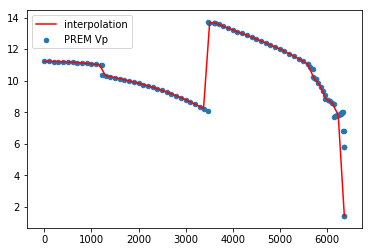

In [22]:
from scipy import interpolate
f = interpolate.interp1d(r, vp)
newx = np.linspace(r.max(), r.min())
newy = f(newx)
plt.plot(newx, newy,'r',label='interpolation')
plt.scatter(r, vp, s=20,label='PREM Vp')
plt.legend()
plt.show()

We'll evaluate the integrals by taking [Riemann sums](https://en.wikipedia.org/wiki/Riemann_sum) of the PREM velocity model for the (regular) $v(r)$:

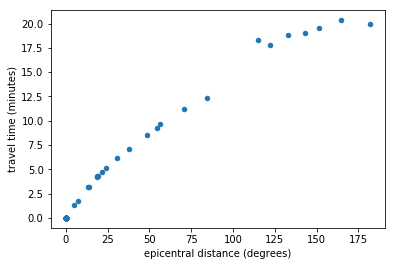

In [23]:
r= newx
v = newy
angles = np.linspace(0.01,0.99*np.pi/2,200)
Tp = []
Deltap = []

for angle in angles:
    p = r[0]*np.sin(angle)/v[0] # constant ray parameter for each take-off angle
    T = 0
    Delta = 0
    for i in range(1,len(r)):
        dr = r[i-1]-r[i]
        if (p*v[i])**2 < r[i]**2: # this is where the ray turns
            denom = np.sqrt(r[i]**2- (p*v[i])**2)
            T = T + 2*dr*(r[i]/v[i])/denom
            Delta = Delta + 2*dr*(p*v[i]/r[i])/denom
        else:
            break
    Tp.append(T)
    Deltap.append(Delta)
    
plt.scatter(180*np.array(Deltap)/np.pi,np.array(Tp)/60, s=20)
plt.xlabel('epicentral distance (degrees)')
plt.ylabel('travel time (minutes)')
plt.show()

These estimates are not too bad, but as always: the devil is in the details. Our interpolation has smoothed out some important detail in the velocity model that is responsible for the (correct) P-wave [shadow zone](https://en.wikipedia.org/wiki/Shadow_zone), for example. More sophisticated schemes to estimate travel times for seismic arrivals are explored in the second part of this lab, where we use readily written code based on the (delay-time $\tau$, ray parameter $p$)-domain, originally proposed by Buland and Chapman (1983), coded up in the [Taup toolkit](https://www.seis.sc.edu/taup/), and then wrapped in [ObsPy](https://github.com/obspy/obspy/wiki).